<h1>Iris Species</h1>

<img src='img/flowers.jpeg' width='1000px' height='1000px'>

# Preprocessing of data
- Import necessary packages required
- Read the required CSV
- how the head of the csv Dataframe
- Look at the info of the Dataframe 
- Look to see if there are any null values

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('CSV/Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
def changeNum(row):
    if row == 'Iris-setosa':
        return 1
    elif row == 'Iris-versicolor':
        return 0
    else:
        return 2

In [7]:
data['Species_Target'] = data['Species'].apply(changeNum)

# EDA(Exploratory Data Analysis)

- Looking at the differnt features of the various species of flowers to see distiguishable differences.

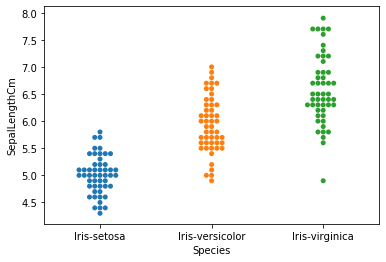

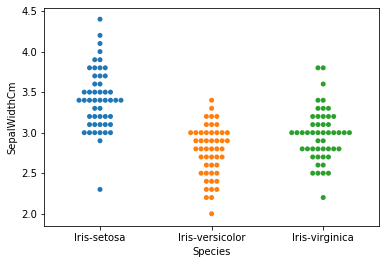

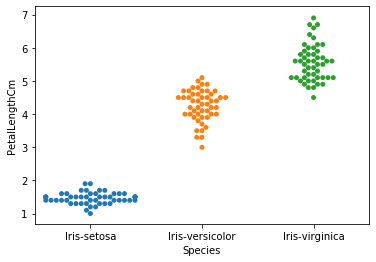

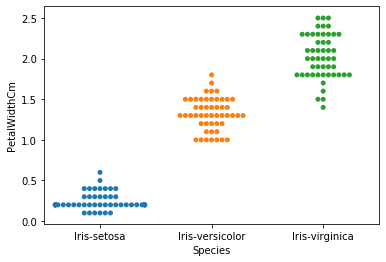

In [10]:
for i in ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']:
    sns.swarmplot(y=i, x="Species", data=data)
    plt.show()

<blockquote> Here we can see that petal width and and petal width are almost clear with distiguising the 3 clusters . We know that theres 3 clusters as our target_species has 3 species.  

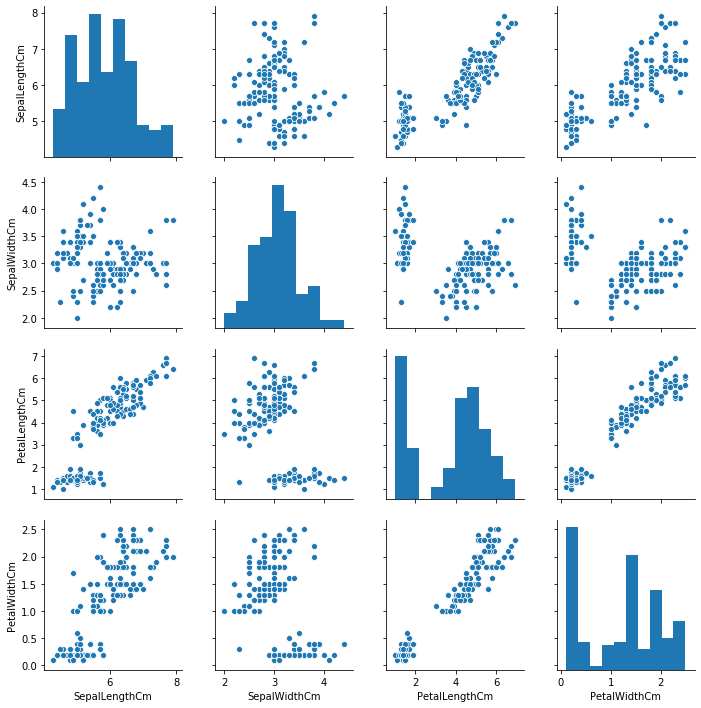

In [8]:
#data1 = data[]
sns.pairplot(data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])

As we can see with the different combinations of scatterplot values we can see 2 clusters with the naked eye . this is kind of where the separation between Versicolor and Virginica isnt seen by us .
This could lead us to the conclusion that there are 2 clusters but we know theres 3 .

Text(0, 0.5, 'Sepal Width')

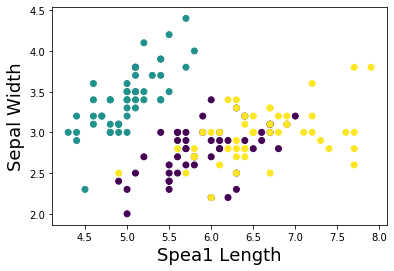

In [22]:
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c=data['Species_Target'])
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

We can see the continuing cross contamination of data which makes seeing the 3rd cluster difficult . Whereas the Iris Setosa is a clear cluster thats very distinguishable.

# The Elbow Method

<blockquote> To find the optimum number of clusters we will look for the elbow to use in our model . We kind of want it to be 3 for it to match the number of species .

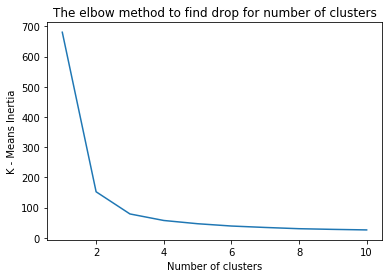

In [26]:
x = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The elbow method to find drop for number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('K - Means Inertia')
plt.show()

We can clearly see that 3 is correct as the appropriate number of clusters . Which proves our initial hypothesis.

## Here we make our Model

- We use the K Means model
- We will fit it
- We predict 
- Seeing our clusters with the different features

In [12]:
k_means = KMeans(init = "k-means++", n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
k_means.fit(x)
y_kmeans = k_means.fit_predict(x)
labels = k_means.labels_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# Score

In [15]:
accuracy_score(data.Species_Target, labels)

0.8933333333333333

# EDA showing our different clusters for different features

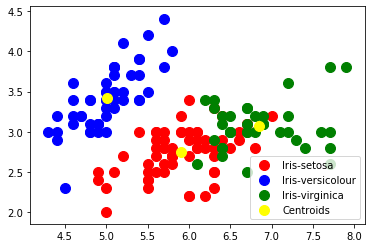

In [17]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Text(0.5, 1.0, 'Predicted')

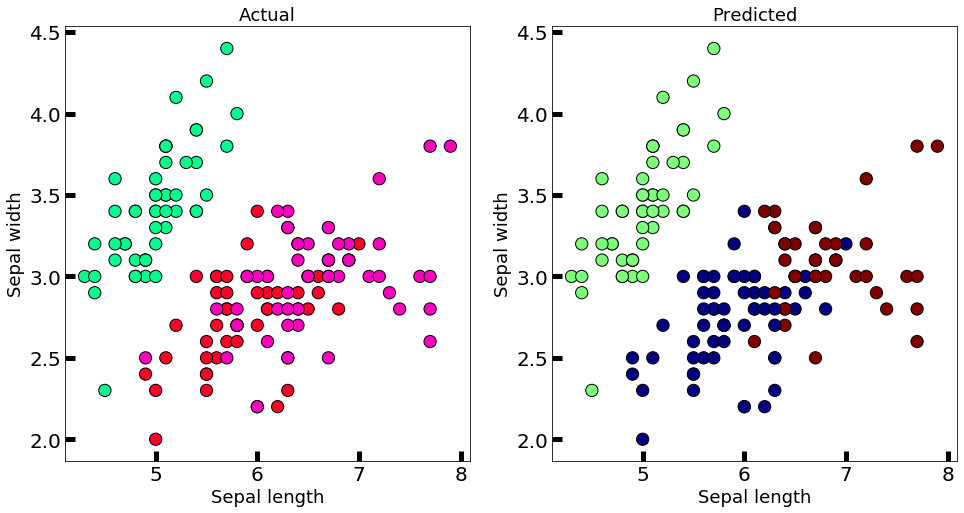

In [24]:
#this will tell us to which cluster does the data observations belong.
new_labels = k_means.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x[:, 0], x[:, 1], c=data['Species_Target'], cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(x[:, 0], x[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

Here we have the 2 scatterplots and can see that the bias of knowing the one cluster clearly is prevalent but because there isnt a distinguible traits between the two so our model guesses between the two . Even though it got a accuracy score of 0.89 that room fopr error is done by the error.

# Classification Report 


In [31]:

from sklearn.metrics import classification_report
print(classification_report(data['Species_Target'], y_kmeans))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        50
           1       1.00      1.00      1.00        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150

